# US18 – Modellbewertung mit Qualitätsmetriken

## Ziel

Ziel dieser User Story ist es, geeignete Metriken zur Bewertung der Modellleistung zu definieren und auf verschiedene Klassifikationsmodelle anzuwenden, um sie objektiv miteinander vergleichen zu können.

## Verwendete Modelle

- Decision Tree
- Support Vector Machine (SVM)
- Random Forest

## Bewertungsmethoden

Folgende Metriken wurden zur Modellbewertung eingesetzt:

- **Accuracy** – misst den Anteil korrekt klassifizierter Beispiele.
- **Precision** – Anteil der tatsächlich korrekten positiven Vorhersagen.
- **Recall** – Anteil der korrekt erkannten tatsächlichen Positiven.
- **F1-Score** – harmonisches Mittel von Precision und Recall.
- **Klassenweise F1, Precision, Recall** – spezifisch für `early`, `middle` und `late` zur genaueren Analyse von Modellstärken und -schwächen.

> Hinweis: Die ROC-AUC wurde hier nicht verwendet, da es sich um ein Multiclass-Problem handelt und die Klassenverteilung ungleich ist.

## Ergebnisse

Die Metriken wurden manuell für jedes Modell erfasst und als **Heatmap** visualisiert, um einen direkten, übersichtlichen Vergleich zu ermöglichen. Dabei wurden sowohl **gesamtmetriken** als auch **klassenweise Werte** einbezogen.

## Visualisierung

Die Ergebnisse wurden in einer farbcodierten Heatmap dargestellt, die alle Metriken für jedes Modell übersichtlich zeigt. So lassen sich Unterschiede zwischen den Modellen schnell erfassen, z. B.:

- Random Forest zeigt hohes Recall für `early`, aber schwaches `middle`.
- SVM liefert ausgeglichene F1-Werte.
- Decision Tree ist insgesamt schwächer, aber interpretierbar.

## Fazit

Die gewählten Metriken ermöglichen eine differenzierte Bewertung der Modellleistung, insbesondere bei unausgeglichenen Klassen. Die Heatmap bietet eine visuelle Grundlage zur Entscheidungsfindung für weitere Optimierungsschritte.


In [13]:
# Modellbewertung: Decision Tree und Random Forest (ohne SVM)

from importlib.util import spec_from_file_location, module_from_spec
import joblib
import sys
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

def load_model_module(path, module_name):
    """Lädt ein Python-Modul dynamisch aus dem Pfad."""
    spec = spec_from_file_location(module_name, path)
    module = module_from_spec(spec)
    sys.modules[module_name] = module
    spec.loader.exec_module(module)
    return module

# --- Module laden ---
dt_module = load_model_module("../src/decision_tree.py", "decision_tree")

# --- Decision Tree ---
print("\nDecision Tree Modell:")
dt_module.train_and_evaluate(
    dt_module.final_model,
    "../data/split_dataset_us14/train_set.tsv",
    "../data/split_dataset_us14/test_set.tsv"
)

# --- Random Forest ---
print("\nRandom Forest Modell:")

# Daten laden
train_df = pd.read_csv("../data/split_dataset_us14/train_set.tsv", sep="\t")
test_df = pd.read_csv("../data/split_dataset_us14/test_set.tsv", sep="\t")

X_train = train_df.drop(columns=["id", "label"])
y_train = train_df["label"]
X_test = test_df.drop(columns=["id", "label"])
y_test = test_df["label"]

# Modell trainieren
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Klassifikationsreport
print(classification_report(y_test, y_pred_rf, digits=2, zero_division=0))


Decision Tree Modell:
Klassifikationsbericht (Testdaten):
              precision    recall  f1-score   support

       early       0.44      0.49      0.46       104
        late       0.41      0.42      0.42        83
      middle       0.24      0.19      0.21        64

    accuracy                           0.39       251
   macro avg       0.36      0.37      0.36       251
weighted avg       0.38      0.39      0.38       251


Random Forest Modell:
              precision    recall  f1-score   support

       early       0.47      0.87      0.61       104
        late       0.53      0.35      0.42        83
      middle       0.50      0.03      0.06        64

    accuracy                           0.48       251
   macro avg       0.50      0.42      0.36       251
weighted avg       0.50      0.48      0.41       251



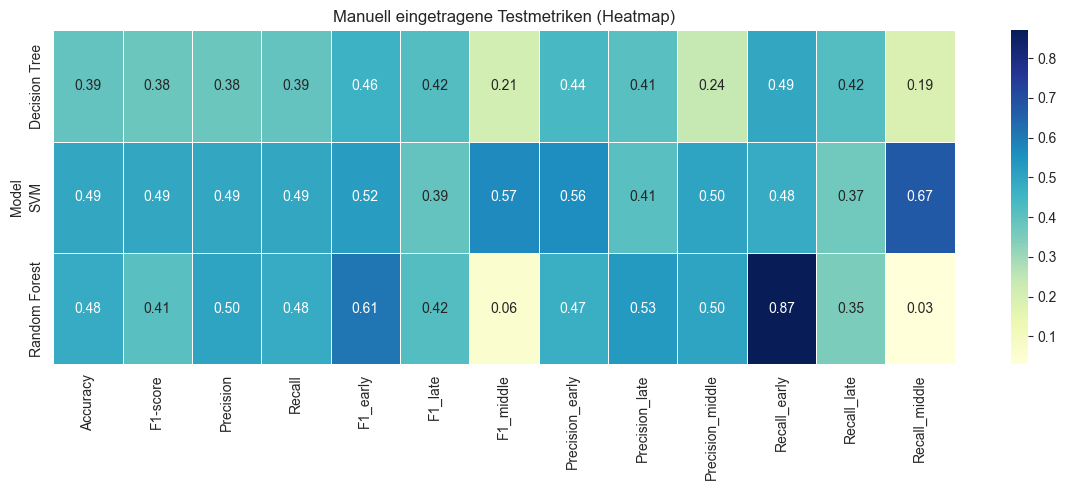

In [1]:
# US18 Modellbewertung mit Qualitätsmetriken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Manuell eingegebene Testergebnisse für verschiedene Modelle
data = {
    "Model": ["Decision Tree", "SVM", "Random Forest"],
    "Accuracy": [0.39, 0.49, 0.48],
    "F1-score": [0.38, 0.49, 0.41],
    "Precision": [0.38, 0.49, 0.50],
    "Recall": [0.39, 0.49, 0.48],
    "F1_early": [0.46, 0.52, 0.61],
    "F1_late": [0.42, 0.39, 0.42],
    "F1_middle": [0.21, 0.57, 0.06],
    "Precision_early": [0.44, 0.56, 0.47],
    "Precision_late": [0.41, 0.41, 0.53],
    "Precision_middle": [0.24, 0.50, 0.50],
    "Recall_early": [0.49, 0.48, 0.87],
    "Recall_late": [0.42, 0.37, 0.35],
    "Recall_middle": [0.19, 0.67, 0.03],
}

df = pd.DataFrame(data)

# Funktion zur Visualisierung der Testmetriken als Heatmap
def plot_heatmap(df):
    df_plot = df.set_index("Model").select_dtypes(include=[float, int])
    fig_width = max(12, df_plot.shape[1] * 0.65)
    plt.figure(figsize=(fig_width, 5))
    sns.heatmap(df_plot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
    plt.title("Manuell eingetragene Testmetriken (Heatmap)")
    plt.tight_layout()
    plt.show()

# Aufruf der Visualisierung
plot_heatmap(df)

# US19 -  Feature Importance Analyse

## Ziel

Ziel dieser Analyse ist es, die wichtigsten Merkmale (Features) für die Klassifikation eines Modells zu identifizieren. Unwichtige Merkmale sollen aussortiert werden, um die Modellqualität zu verbessern und die Interpretierbarkeit zu erhöhen.

## Methoden

Folgende Methoden wurden eingesetzt:

1. **Gini Importance**
   Berechnet auf Basis des trainierten Random Forest. Misst, wie stark ein Feature zur Reinheit der Entscheidungsbäume beiträgt.

2. **Permutation Importance**
   Misst den Einfluss eines Features auf die Modellleistung, indem seine Werte zufällig permutiert werden.

3. **SHAP (SHapley Additive exPlanations)**
   Liefert eine konsistente und lokal erklärbare Metrik für die Auswirkung jedes Features auf die Vorhersage des Modells.

## Datenbasis

Die Analyse basiert auf Trainings- und Testdaten aus dem `split_dataset_us14`. Die Merkmale wurden aus `.tsv`-Dateien geladen. Die Zielvariable ist `"label"`.

## Ergebnisse

- Die **Top 10 wichtigsten Features** wurden für jede Methode visualisiert.
- Features mit einem SHAP-Wert kleiner als `0.001` gelten als **nicht relevant** und wurden zur Löschung vorgeschlagen.
- Die Entscheidung wurde in der Datei `../reports/feature_selection_decision.txt` dokumentiert.

## Visualisierungen

Die Analyse enthält Barplots für:
- Gini Importance
- Permutation Importance
- SHAP-Werte (globaler Einfluss)

## Ausblick

Diese Ergebnisse können für eine neue Modelliteration mit reduzierter Feature-Menge verwendet werden, um:
- Rechenzeit zu sparen
- Overfitting zu vermeiden
- die Interpretierbarkeit zu verbessern

Top 10 SHAP Features (Decision Tree):
protein_length    0.082188
dna_kmer_3_CGT    0.060901
aa_F              0.047720
dna_kmer_3_ATG    0.047235
dna_kmer_3_GGT    0.033191
aa_Y              0.029615
dna_kmer_3_GCG    0.028040
dna_kmer_3_CAA    0.026316
aa_Q              0.022617
aa_N              0.022344
dtype: float64

Top 10 SHAP Features (Random Forest):
dna_kmer_3_CGG      0.006088
protein_length      0.005290
dna_kmer_3_GCG      0.005285
dna_kmer_3_ATG      0.005176
gc_content          0.004833
dna_kmer_3_GAA      0.003639
aa_F                0.003633
dna_kmer_3_ACC      0.003518
dna_length          0.003502
stop_codon_count    0.003377
dtype: float64


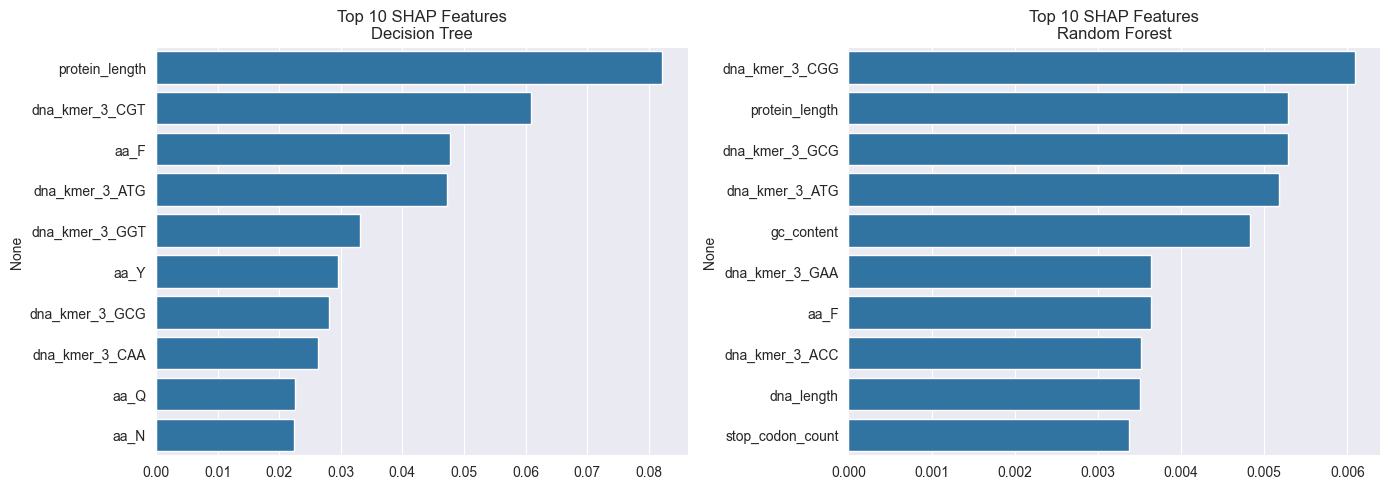

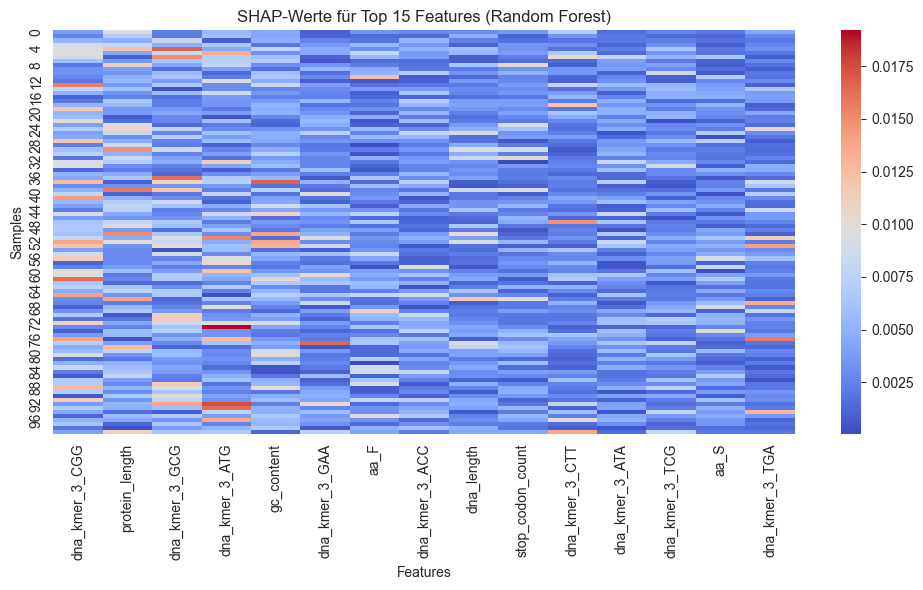


Unwichtige Features (Decision Tree, SHAP < 0.001):
['prot_kmer_3_SST', 'dna_kmer_3_CCA', 'prot_kmer_3_ILS', 'dna_kmer_3_TCA', 'prot_kmer_3_IGL', 'dna_kmer_3_CCT', 'prot_kmer_3_NSD', 'prot_kmer_3_LTK', 'prot_kmer_3_IAA', 'prot_kmer_3_FRN', 'prot_kmer_3_GRI', 'prot_kmer_3_DIN', 'prot_kmer_3_FDT', 'prot_kmer_3_NKN', 'prot_kmer_3_IEI', 'prot_kmer_3_VTV', 'prot_kmer_3_LSI', 'prot_kmer_3_IGA', 'prot_kmer_3_TIW', 'prot_kmer_3_VGL', 'prot_kmer_3_GLT', 'prot_kmer_3_YYI', 'prot_kmer_3_NKL', 'prot_kmer_3_VLK', 'prot_kmer_3_MTA', 'prot_kmer_3_TNA', 'prot_kmer_3_KSY', 'dna_kmer_3_TAA', 'dna_kmer_3_TAC', 'dna_kmer_3_TAG', 'dna_kmer_3_TCG', 'dna_kmer_3_TCT', 'dna_kmer_3_TGA', 'dna_kmer_3_TGC', 'dna_kmer_3_TGG', 'dna_kmer_3_TGT', 'dna_kmer_3_TTA', 'start_codon_count', 'stop_codon_count', 'gravy', 'instability_index', 'aa_A', 'aa_C', 'aa_E', 'aa_H', 'aa_T', 'aa_V', 'dipep_AA', 'dipep_AC', 'dipep_AD', 'dipep_AE', 'dipep_AF', 'dipep_AG', 'dipep_AH', 'dipep_AI', 'dipep_AK', 'dipep_AL', 'dipep_AM', 'dipep

In [9]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# --- Daten laden ---
train_df = pd.read_csv("../data/split_dataset_us14/train_set.tsv", sep="\t")

X_train = train_df.drop(columns=["id", "label"])
y_train = train_df["label"]

# --- Label-Encoding ---
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)

# --- SHAP Sample vorbereiten ---
X_sample = X_train.sample(n=100, random_state=42)

# --- Modell 1: Decision Tree ---
clf_dt = DecisionTreeClassifier(max_depth=10, random_state=42)
clf_dt.fit(X_train, y_train_enc)

explainer_dt = shap.TreeExplainer(clf_dt, data=X_sample)
shap_values_dt = explainer_dt.shap_values(X_sample, check_additivity=False)

if isinstance(shap_values_dt, list):
    shap_array_dt = np.mean([np.abs(sv) for sv in shap_values_dt], axis=0)
else:
    shap_array_dt = np.abs(shap_values_dt).mean(axis=2)

mean_shap_dt = pd.Series(shap_array_dt.mean(axis=0), index=X_train.columns).sort_values(ascending=False)
print("Top 10 SHAP Features (Decision Tree):")
print(mean_shap_dt.head(10))

# --- Modell 2: Random Forest ---
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train_enc)

explainer_rf = shap.TreeExplainer(clf_rf, data=X_sample)
shap_values_rf = explainer_rf.shap_values(X_sample, check_additivity=False)

if isinstance(shap_values_rf, list):
    shap_array_rf = np.mean([np.abs(sv) for sv in shap_values_rf], axis=0)
else:
    shap_array_rf = np.abs(shap_values_rf).mean(axis=2)

mean_shap_rf = pd.Series(shap_array_rf.mean(axis=0), index=X_train.columns).sort_values(ascending=False)
print("\nTop 10 SHAP Features (Random Forest):")
print(mean_shap_rf.head(10))

# --- Visualisierung: Barplot-Vergleich nebeneinander ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x=mean_shap_dt.head(10).values, y=mean_shap_dt.head(10).index, ax=axes[0])
axes[0].set_title("Top 10 SHAP Features\nDecision Tree")

sns.barplot(x=mean_shap_rf.head(10).values, y=mean_shap_rf.head(10).index, ax=axes[1])
axes[1].set_title("Top 10 SHAP Features\nRandom Forest")

plt.tight_layout()
plt.show()

# --- Zusätzliche Visualisierung: Heatmap Top 15 SHAP-Werte (Random Forest) ---
shap_df_rf = pd.DataFrame(shap_array_rf, columns=X_train.columns)
top15 = mean_shap_rf.head(15).index.tolist()

plt.figure(figsize=(10, 6))
sns.heatmap(shap_df_rf[top15], cmap="coolwarm", cbar=True)
plt.title("SHAP-Werte für Top 15 Features (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.tight_layout()
plt.show()

# --- Dokumentation: Unwichtige Features (SHAP < 0.001) ---
low_value_dt = mean_shap_dt[mean_shap_dt < 0.001].index.tolist()
low_value_rf = mean_shap_rf[mean_shap_rf < 0.001].index.tolist()

print("\nUnwichtige Features (Decision Tree, SHAP < 0.001):")
print(low_value_dt)
print("\nUnwichtige Features (Random Forest, SHAP < 0.001):")
print(low_value_rf)


  0%|          | 0/20 [00:00<?, ?it/s]

C:\Users\hathu\OneDrive\Dokumente\Teamprojekt\bold-binders\.venv\Lib\site-packages\shap\explainers\_kernel.py:708: UserWarning: Linear regression equation is singular, a least squares solutions is used instead.
To avoid this situation and get a regular matrix do one of the following:
1) turn up the number of samples,
2) turn up the L1 regularization with num_features(N) where N is less than the number of samples,
3) group features together to reduce the number of inputs that need to be explained.
  warnings.warn(
C:\Users\hathu\OneDrive\Dokumente\Teamprojekt\bold-binders\.venv\Lib\site-packages\sklearn\linear_model\_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=2.244e-04, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
C:\Users\hathu\OneDrive\Dokumente\Teamprojekt\bold-binders\.venv\Lib\site-package

Top 10 SHAP Features (SVM):
dna_length          0.031809
stop_codon_count    0.008363
protein_length      0.001760
prot_kmer_3_GEG     0.000807
prot_kmer_3_IKS     0.000784
dna_kmer_3_AGT      0.000471
prot_kmer_3_AVE     0.000452
prot_kmer_3_AQV     0.000386
prot_kmer_3_NKV     0.000382
dna_kmer_3_ATG      0.000325
dtype: float64


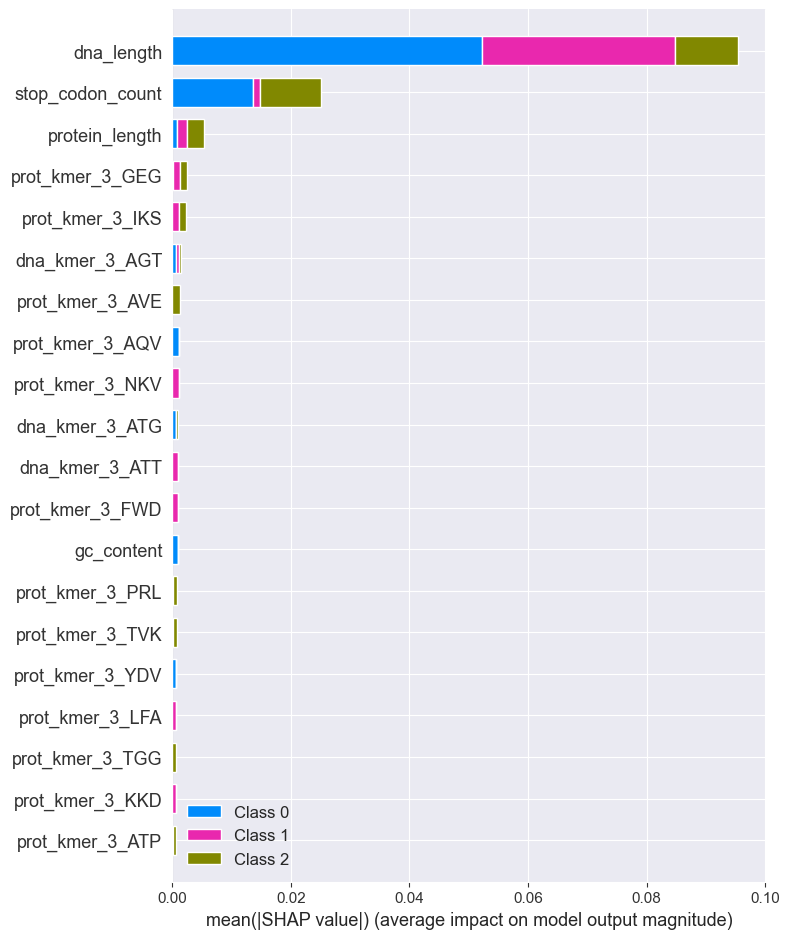

In [10]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import joblib
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# --- Daten laden ---
train_df = pd.read_csv("../data/split_dataset_us14/train_set.tsv", sep="\t")
X_train = train_df.drop(columns=["id", "label"])
y_train = train_df["label"]

# --- Label-Encoding ---
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)

# --- SVM trainieren mit probability=True ---
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, random_state=42)
svm_model.fit(X_train, y_train_enc)

# --- Modell speichern (optional) ---
joblib.dump(svm_model, "../models/final_svm_model.pkl")

# --- SHAP vorbereiten ---
X_small = X_train.sample(n=20, random_state=42)
explainer_svm = shap.KernelExplainer(svm_model.predict_proba, shap.kmeans(X_small, 5))
shap_values_svm = explainer_svm.shap_values(X_small, nsamples=100)

# --- SHAP-Werte mitteln ---
if isinstance(shap_values_svm, list):
    shap_array = np.mean([np.abs(sv) for sv in shap_values_svm], axis=0)
else:
    shap_array = np.abs(shap_values_svm).mean(axis=2)

mean_shap_svm = pd.Series(shap_array.mean(axis=0), index=X_train.columns).sort_values(ascending=False)

# --- Ausgabe + Plot ---
print("Top 10 SHAP Features (SVM):")
print(mean_shap_svm.head(10))

shap.summary_plot(shap_values_svm, X_small, plot_type="bar", show=True)

  0%|          | 0/20 [00:00<?, ?it/s]

C:\Users\hathu\OneDrive\Dokumente\Teamprojekt\bold-binders\.venv\Lib\site-packages\sklearn\linear_model\_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=4.707e-03, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
C:\Users\hathu\OneDrive\Dokumente\Teamprojekt\bold-binders\.venv\Lib\site-packages\sklearn\linear_model\_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.598e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
C:\Users\hathu\OneDrive\Dokumente\Teamprojekt\bold-binders\.venv\Lib\site-packages\sklearn\linear_model\_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regress

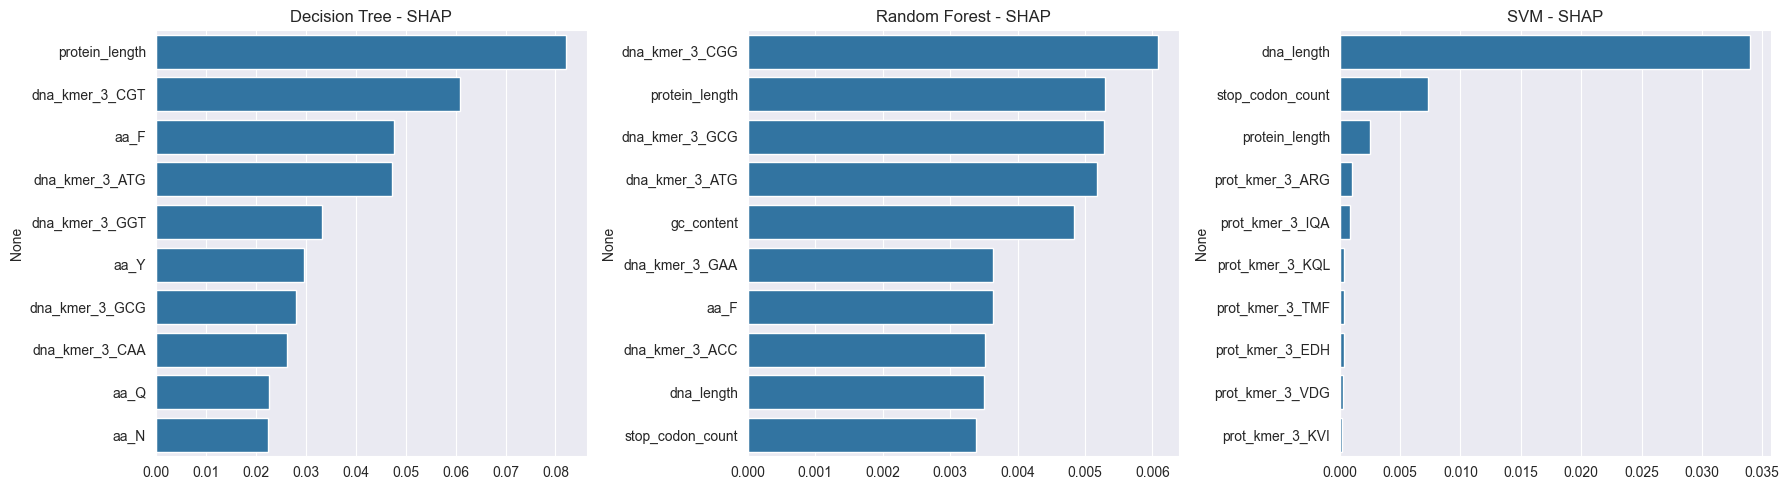

In [11]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# --- Daten laden ---
train_df = pd.read_csv("../data/split_dataset_us14/train_set.tsv", sep="\t")
X_train = train_df.drop(columns=["id", "label"])
y_train = train_df["label"]

# --- Label-Encoding ---
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)

# --- SHAP-Subsample vorbereiten ---
X_small = X_train.sample(n=20, random_state=42)
X_sample = X_train.sample(n=100, random_state=42)

# --- Modell 1: Decision Tree ---
clf_dt = DecisionTreeClassifier(max_depth=10, random_state=42)
clf_dt.fit(X_train, y_train_enc)
explainer_dt = shap.TreeExplainer(clf_dt, data=X_sample)
shap_values_dt = explainer_dt.shap_values(X_sample, check_additivity=False)
shap_array_dt = np.mean([np.abs(sv) for sv in shap_values_dt], axis=0) if isinstance(shap_values_dt, list) else np.abs(shap_values_dt).mean(axis=2)
mean_shap_dt = pd.Series(shap_array_dt.mean(axis=0), index=X_train.columns).sort_values(ascending=False)

# --- Modell 2: Random Forest ---
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train_enc)
explainer_rf = shap.TreeExplainer(clf_rf, data=X_sample)
shap_values_rf = explainer_rf.shap_values(X_sample, check_additivity=False)
shap_array_rf = np.mean([np.abs(sv) for sv in shap_values_rf], axis=0) if isinstance(shap_values_rf, list) else np.abs(shap_values_rf).mean(axis=2)
mean_shap_rf = pd.Series(shap_array_rf.mean(axis=0), index=X_train.columns).sort_values(ascending=False)

# --- Modell 3: SVM mit probability=True ---
clf_svm = SVC(kernel="rbf", probability=True, random_state=42)
clf_svm.fit(X_train, y_train_enc)
explainer_svm = shap.KernelExplainer(clf_svm.predict_proba, shap.kmeans(X_small, 5))
shap_values_svm = explainer_svm.shap_values(X_small, nsamples=100)
shap_array_svm = np.mean([np.abs(sv) for sv in shap_values_svm], axis=0) if isinstance(shap_values_svm, list) else np.abs(shap_values_svm).mean(axis=2)
mean_shap_svm = pd.Series(shap_array_svm.mean(axis=0), index=X_train.columns).sort_values(ascending=False)


# --- Barplot-Vergleich ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(x=mean_shap_dt.head(10).values, y=mean_shap_dt.head(10).index, ax=axes[0])
axes[0].set_title("Decision Tree - SHAP")
sns.barplot(x=mean_shap_rf.head(10).values, y=mean_shap_rf.head(10).index, ax=axes[1])
axes[1].set_title("Random Forest - SHAP")
sns.barplot(x=mean_shap_svm.head(10).values, y=mean_shap_svm.head(10).index, ax=axes[2])
axes[2].set_title("SVM - SHAP")
plt.tight_layout()
plt.show()
